1. [40] Use AGNES algorithm with Euclidean distance and single link to find the hierarchies
of clusters in the following data set.

This section is an accompaniment to the word file


In [0]:
import numpy as np

X = np.array([[1,1],  
    [2,1],
    [2,3],
    [5,2],
    [6,1],
    [7,3],
    [9,1],
    [9,3],])

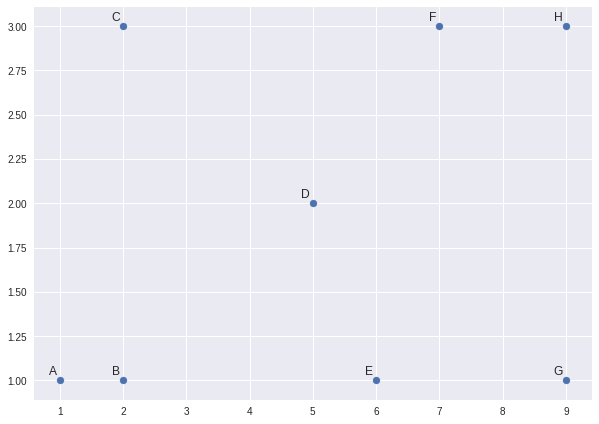

In [0]:
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show() 

In [0]:
import pandas as pd
from scipy.spatial import distance_matrix

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

df = pd.DataFrame(X, columns=['xcord', 'ycord'], index=labels)
df

,xcord,ycord
A,1,1
B,2,1
C,2,3
D,5,2
E,6,1
F,7,3
G,9,1
H,9,3


In [0]:
pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

,A,B,C,D,E,F,G,H
A,0.000000,1.000000,2.236068,4.123106,5.000000,6.324555,8.000000,8.246211
B,1.000000,0.000000,2.000000,3.162278,4.000000,5.385165,7.000000,7.280110
C,2.236068,2.000000,0.000000,3.162278,4.472136,5.000000,7.280110,7.000000
D,4.123106,3.162278,3.162278,0.000000,1.414214,2.236068,4.123106,4.123106
E,5.000000,4.000000,4.472136,1.414214,0.000000,2.236068,3.000000,3.605551
F,6.324555,5.385165,5.000000,2.236068,2.236068,0.000000,2.828427,2.000000
G,8.000000,7.000000,7.280110,4.123106,3.000000,2.828427,0.000000,2.000000
H,8.246211,7.280110,7.000000,4.123106,3.605551,2.000000,2.000000,0.000000


In [0]:

data = [0, 2.23, 3.16, 4, 5.38, 7, 7.28]

indexs = ['AB', 'C', 'D', 'E', 'F', 'G', 'H']

df = pd.DataFrame(data, columns=['AB'], index=indexs)
df

,AB
AB,0.00
C,2.23
D,3.16
E,4.00
F,5.38
G,7.00
H,7.28


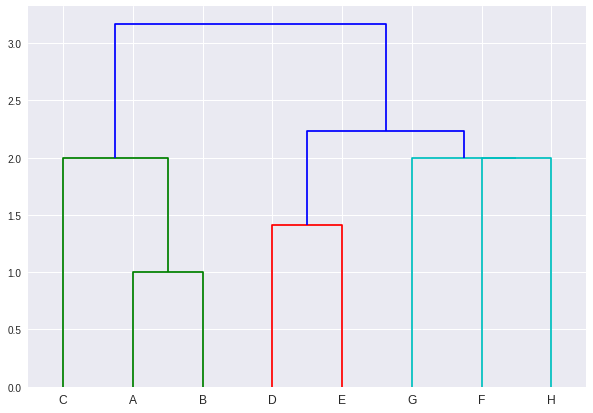

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

2. [60] Write a Jupyter notebook that runs SciKit-Learn clustering algorithms on the given
hwk09.csv datasets.

In [0]:
#K-Means
from google.colab import files
uploaded = files.upload()

Saving hwk09.csv to hwk09.csv


(a) Run k-Means algorithm using several values of k

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

data = pd.read_csv("hwk09.csv")

f1 = data['x'].values
f2 = data['y'].values

X = np.array(list(zip(f1, f2)))

In [0]:
# Creating a sample dataset with 3 clusters
#X, Y = make_blobs(n_samples=800, n_features=3, centers=3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

C

array([[-4.90914469,  0.11313436],
       [ 1.6400471 ,  0.44241664],
       [-8.87177269, -5.36630437]])

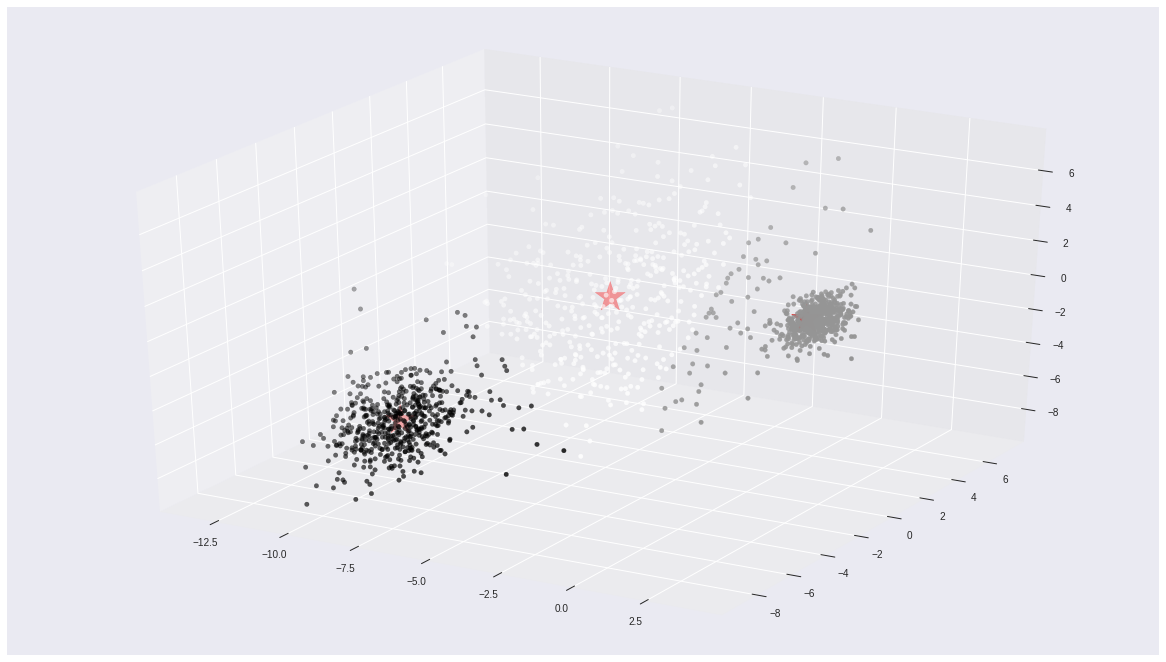

In [0]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 1], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 1], marker='*', c='#FF0000', s=1000)

(b) Run DBSCAN algorithm with several pairs of and minP ts

In [0]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

X = np.array(list(zip(f1, f2)))

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(f2, labels))
print("Completeness: %0.3f" % metrics.completeness_score(f2, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(f2, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(f2, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(f2, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 3
Estimated number of noise points: 645
Homogeneity: 0.148
Completeness: 1.000
V-measure: 0.258
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.225


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


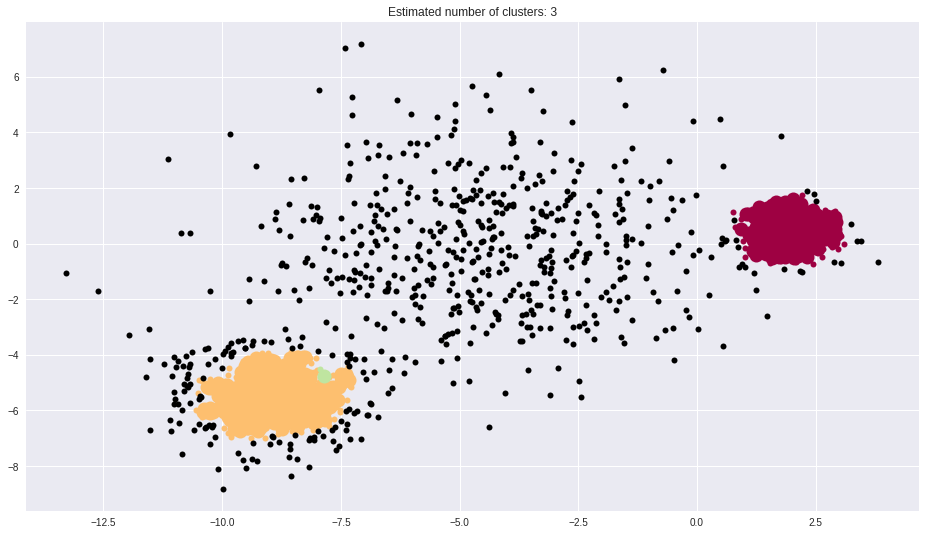

In [0]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()